In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_excel(r"dataset\processed_data\main\final_cleaned_dataset.xlsx")

In [3]:
data.head()

,Unnamed: 0,District,"Laboratory confirmed, since the beginning of the pandemic TOTAL","Laboratory confirmed, since the beginning of the pandemic Difference from","Laboratory confirmed, since the beginning of the pandemic Hospitalized","Laboratory confirmed, since the beginning of the pandemic Deceased","Laboratory confirmed, since the beginning of the pandemic RecoveredA","Laboratory confirmed, since the beginning of the pandemic Current CasesB","Reported, the last 7 days,Incidence per 100, Incidence per 100 ,+USAFD","Reported, the last 7 days,Incidence per 100, Incidence per 100 ,<20 Jahre","Reported, the last 7 days,Incidence per 100, Incidence per 100 ,20-59 JahreE","Reported, the last 7 days,Incidence per 100, Incidence per 100 ,>=60 Jahre"
0,0,Ahrweiler,4577,4,199,52.0,4423,102,50.0,132.2,49.0,7.1
1,1,Altenkirchen,4956,0,411,101.0,4833,22,8.5,8.4,12.1,2.6
2,2,Alzey-Worms,5130,1,304,123.0,4970,37,9.3,24.0,4.4,8.2
3,3,Bad Dürkheim,4499,1,305,150.0,4303,46,14.3,21.6,19.5,2.3
4,4,Bad Kreuznach,6121,0,160,142.0,5923,56,18.3,41.4,20.0,2.0


Recovery Rate= (Recovered Cases/ Total Confirmed Cases) × 100


Hospitalization Rate= (Hospitalized Cases / Total Confirmed Cases) × 100


In [4]:
# Calculate recovery rate and hospitalization rate
# Assuming that "RecoveredA" column represents the recovered cases
data['Recovery Rate'] = (data['Laboratory confirmed, since the beginning of the pandemic RecoveredA'] / 
                        data['Laboratory confirmed, since the beginning of the pandemic TOTAL']) * 100

data['Hospitalization Rate'] = (data['Laboratory confirmed, since the beginning of the pandemic Hospitalized'] / 
                               data['Laboratory confirmed, since the beginning of the pandemic TOTAL']) * 100

# Select relevant columns for clustering
clustering_data = data[['District', 'Recovery Rate', 'Hospitalization Rate']]

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
clustering_data[['Recovery Rate', 'Hospitalization Rate']] = scaler.fit_transform(clustering_data[['Recovery Rate', 'Hospitalization Rate']])

clustering_data.head()

C:\Users\Parminder.Grewal\AppData\Local\Temp\ipykernel_3352\343947596.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data[['Recovery Rate', 'Hospitalization Rate']] = scaler.fit_transform(clustering_data[['Recovery Rate', 'Hospitalization Rate']])


,District,Recovery Rate,Hospitalization Rate
0,Ahrweiler,0.935490,0.318961
1,Altenkirchen,0.955417,0.684262
2,Alzey-Worms,0.941037,0.465085
3,Bad Dürkheim,0.913101,0.544101
4,Bad Kreuznach,0.938422,0.158413


The recovery rate and hospitalization rate for each district have been calculated and normalized.

Now the goal is to perform hierarchical clustering on the data. To determine the optimal number of clusters, we'll plot a dendrogram. This will provide a visual representation of how the districts are grouped together at various levels of similarity.

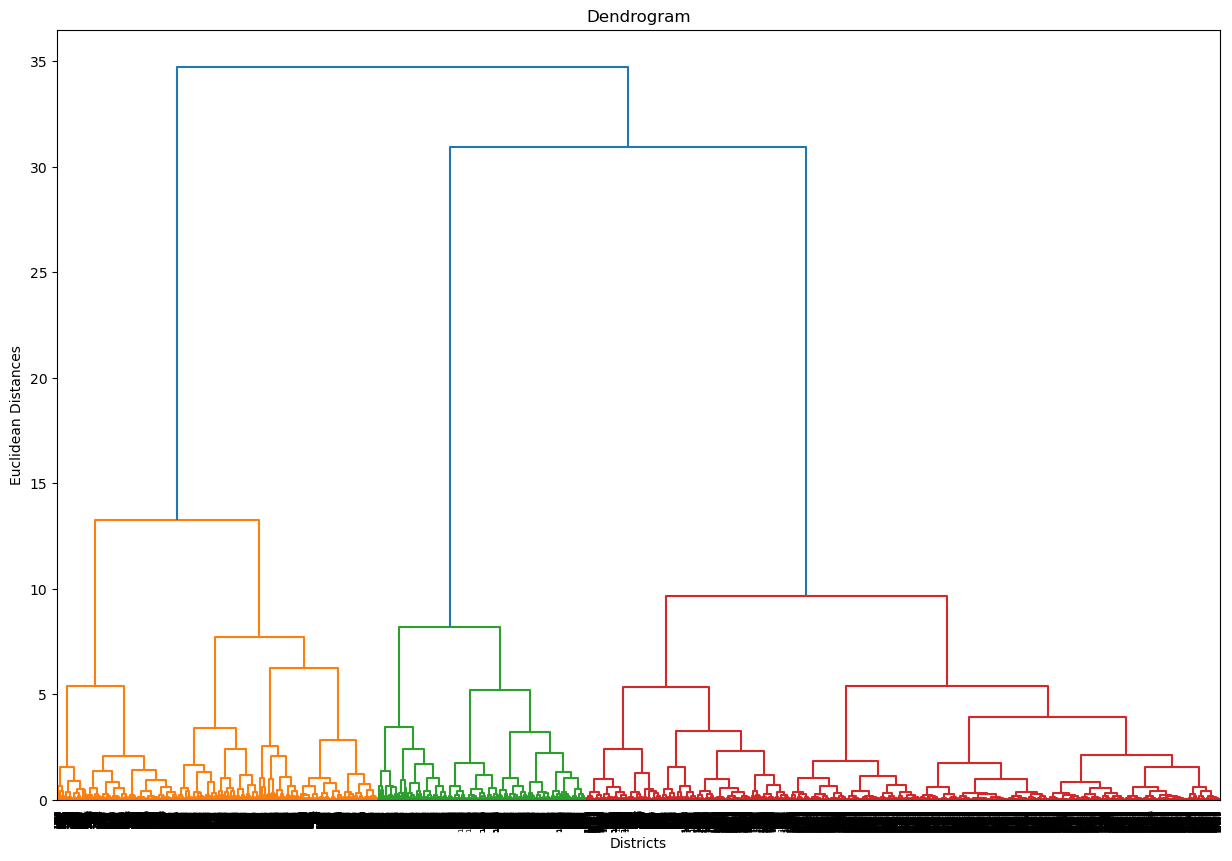

In [7]:
# Plotting a dendrogram
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(clustering_data[['Recovery Rate', 'Hospitalization Rate']], method='ward'))
plt.title('Dendrogram')
plt.xlabel('Districts')
plt.ylabel('Euclidean Distances')
plt.show()

As this is giving very abrupt dendogram, tried to do with sample data of 50 random and plotted dendogram for sampled data just for sake of visualization.

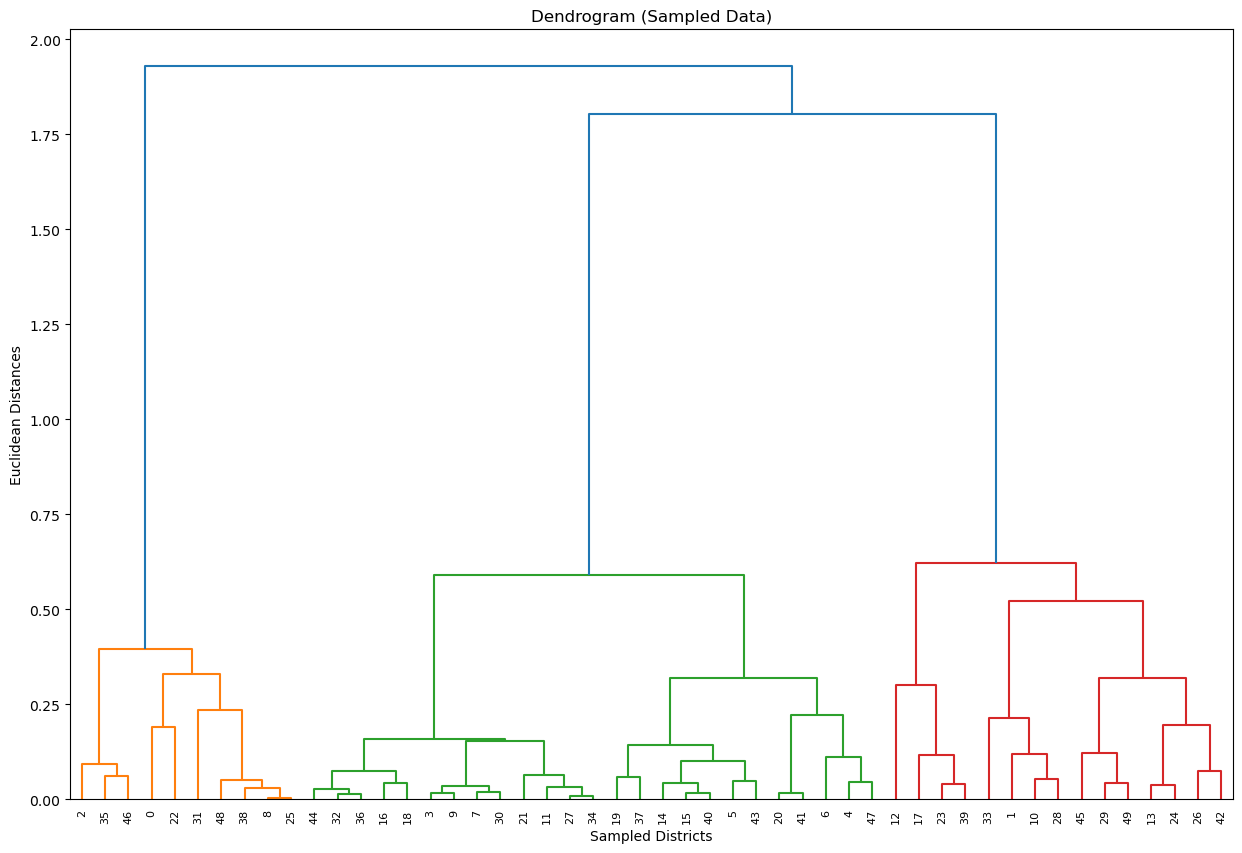

In [8]:
#leave the sample data and do for whole as well.. 
# Sample the data
sample_data = clustering_data.sample(n=50, random_state=42)

# Plotting a dendrogram for the sampled data
plt.figure(figsize=(15, 10))
dendrogram_sample = sch.dendrogram(sch.linkage(sample_data[['Recovery Rate', 'Hospitalization Rate']], method='ward'))
plt.title('Dendrogram (Sampled Data)')
plt.xlabel('Sampled Districts')
plt.ylabel('Euclidean Distances')
plt.show()


performed hierarchical clustering directly on the entire dataset and decide on the number of clusters based on the results. Applying AgglomerativeClustering.

In [9]:
from sklearn.cluster import AgglomerativeClustering

# Assuming we want 5 clusters 

cluster_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_data['Cluster'] = cluster_model.fit_predict(clustering_data[['Recovery Rate', 'Hospitalization Rate']])

# Count of districts in each cluster
cluster_counts = clustering_data['Cluster'].value_counts()

cluster_counts


C:\Users\Parminder.Grewal\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Parminder.Grewal\AppData\Local\Temp\ipykernel_3352\3778946975.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['Cluster'] = cluster_model.fit_predict(clustering_data[['Recovery Rate', 'Hospitalization Rate']])


2    6172
0    2991
4    2918
1    2882
3    1737
Name: Cluster, dtype: int64

In [11]:
cluster_model

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

Now for assigning value to each district based on recovery rate and hospitalisation rate. This was done using scoring mechanism.
The approach used here is to use a weighted sum of the normalized values of the recovery rate and hospitalization rate. Here's  formula:

Score= w1 × Recovery Rate − w2 × Hospitalization Rate

Where: w1 and w2 are weights assigned to the recovery rate and hospitalization rate, respectively. The weights determine the importance of each metric. For instance, if recovery is more important, w1 could be greater than w2.
We subtract the hospitalization rate from the score as a higher hospitalization rate is typically seen as negative, while a higher recovery rate is positive.
For simplicity, we can start with equal weights, i.e., w1 = w2 = 0.5


In [15]:
# Aggregate data at the district level
district_aggregated = clustering_data.groupby('District').agg({
    'Recovery Rate': 'mean',
    'Hospitalization Rate': 'mean'
}).reset_index()

# Compute scores for each aggregated district
w1, w2 = 0.5, 0.5
district_aggregated['Score'] = w1 * district_aggregated['Recovery Rate'] - w2 * district_aggregated['Hospitalization Rate']

# Sort districts based on their scores
district_aggregated_ranking = district_aggregated[['District', 'Score']].sort_values(by='Score', ascending=False).reset_index(drop=True)
top_10_districts_aggregated = district_aggregated_ranking.head(10)

top_10_districts_aggregated

#district_aggregated_ranking

,District,Score
0,KS Frankenthal,0.348409
1,Bad Kreuznach,0.344480
2,KS Ludwigshafen,0.333709
3,Rhein-Pfalz-Kreis,0.331606
4,Neuwied,0.331157
5,KS Speyer,0.330211
6,KS Koblenz,0.321166
7,Mayen-Koblenz,0.309641
8,Bitburg-Prüm,0.305887
9,KS Trier,0.300121


Cluster Analysis: # Kmeans & Agglomerative Clustering 
We'll use the scores to cluster districts into groups that have similar outcomes. To determine the optimal number of clusters, we'll first plot an Elbow curve. This will give us an idea of how the total variance within the clusters decreases as the number of clusters increases. The point where the reduction in variance starts to level off (the "elbow" point) suggests an optimal number of clusters.

C:\Users\Parminder.Grewal\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Parminder.Grewal\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Parminder.Grewal\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Parminder.Grewal\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

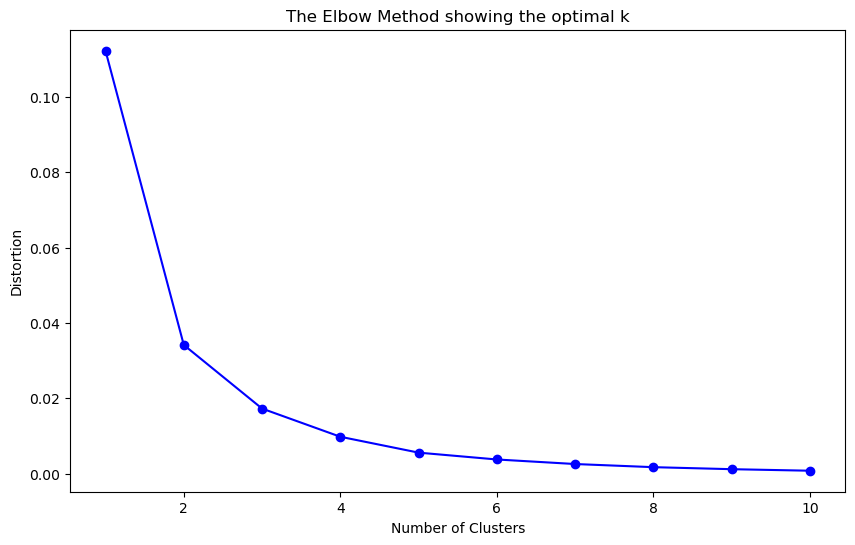

In [17]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow method
distortions = []
K = range(1, 11)  # We'll check for up to 10 clusters
for k in K:
    kmean_model = KMeans(n_clusters=k)
    kmean_model.fit(district_aggregated[['Score']])
    distortions.append(kmean_model.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


From the plot, it seems that the reduction in variance starts to level off around 3 or 4 clusters. Thus, either 3 or 4 could be considered as an optimal number of clusters.

C:\Users\Parminder.Grewal\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Parminder.Grewal\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


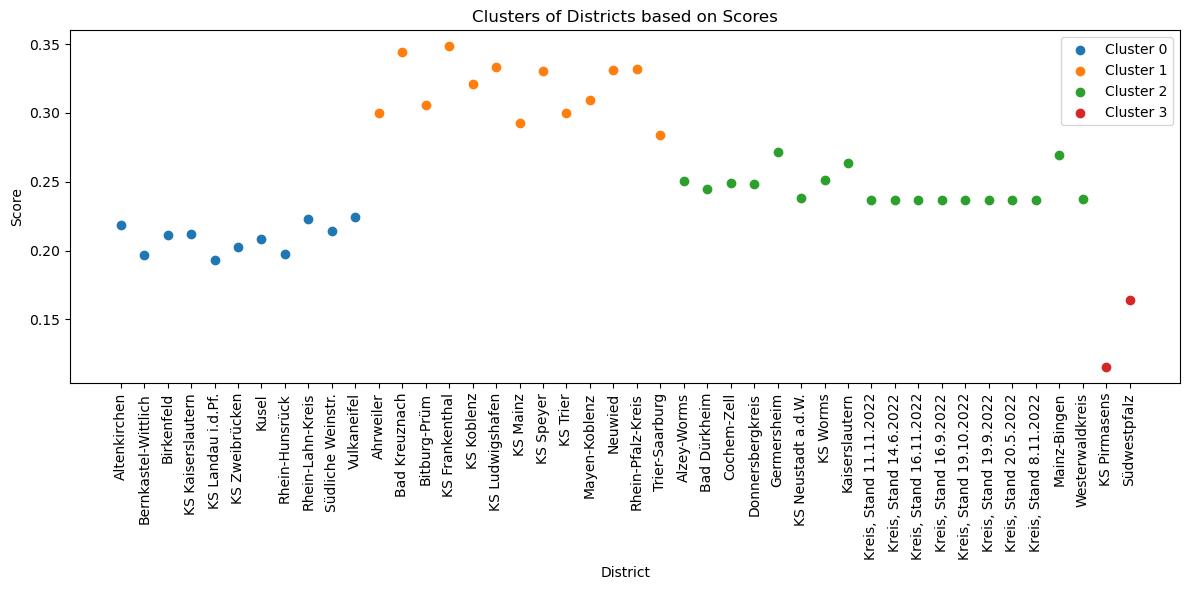

In [18]:
# Apply KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
district_aggregated['Cluster'] = kmeans.fit_predict(district_aggregated[['Score']])

# Visualize the distribution of scores within each cluster
plt.figure(figsize=(12, 6))
for i in range(4):
    cluster_data = district_aggregated[district_aggregated['Cluster'] == i]
    plt.scatter(cluster_data['District'], cluster_data['Score'], label=f'Cluster {i}')
    
plt.xlabel('District')
plt.ylabel('Score')
plt.title('Clusters of Districts based on Scores')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


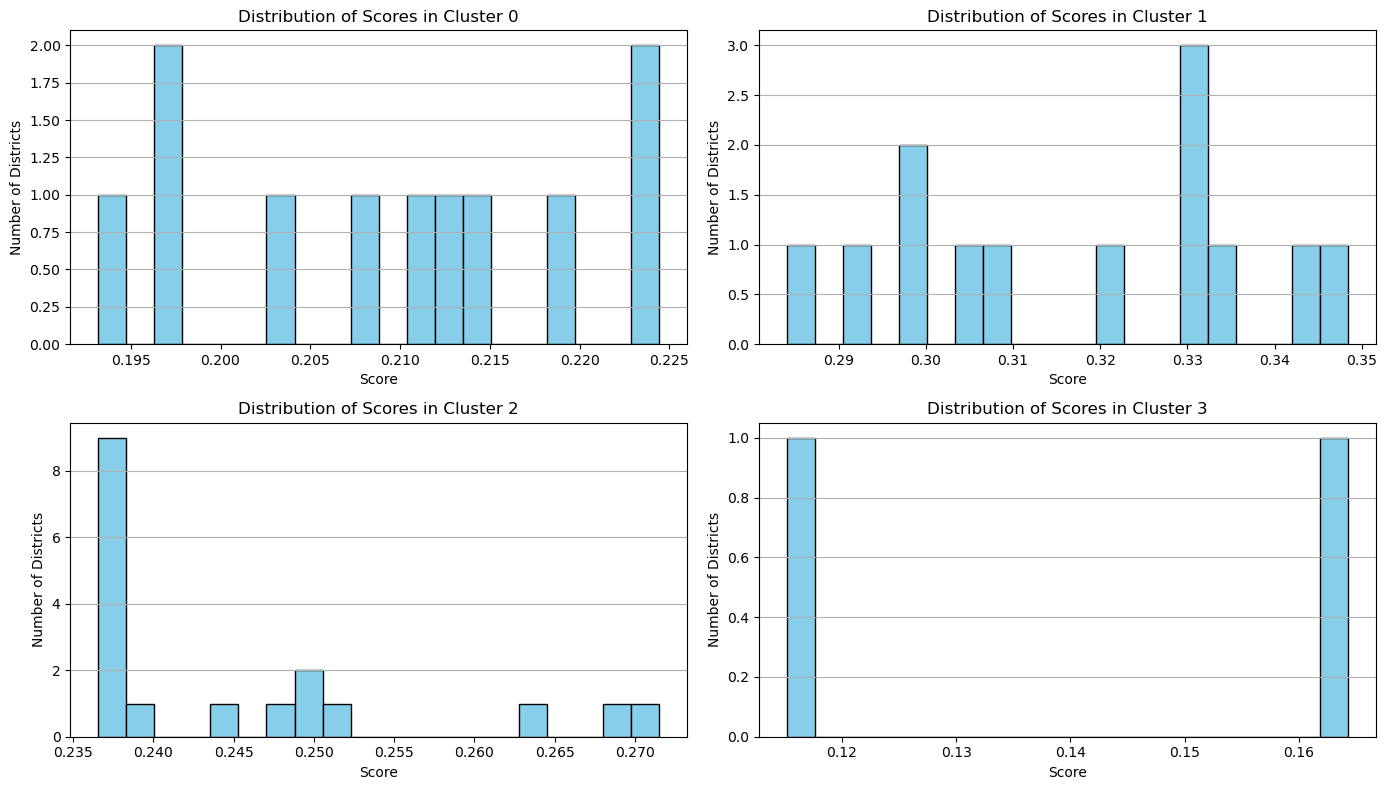

In [19]:
# Plot histograms for each cluster
plt.figure(figsize=(14, 8))

for i in range(4):
    cluster_data = district_aggregated[district_aggregated['Cluster'] == i]['Score']
    plt.subplot(2, 2, i+1)
    plt.hist(cluster_data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Scores in Cluster {i}')
    plt.xlabel('Score')
    plt.ylabel('Number of Districts')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()


# Agglomerative Clustering 

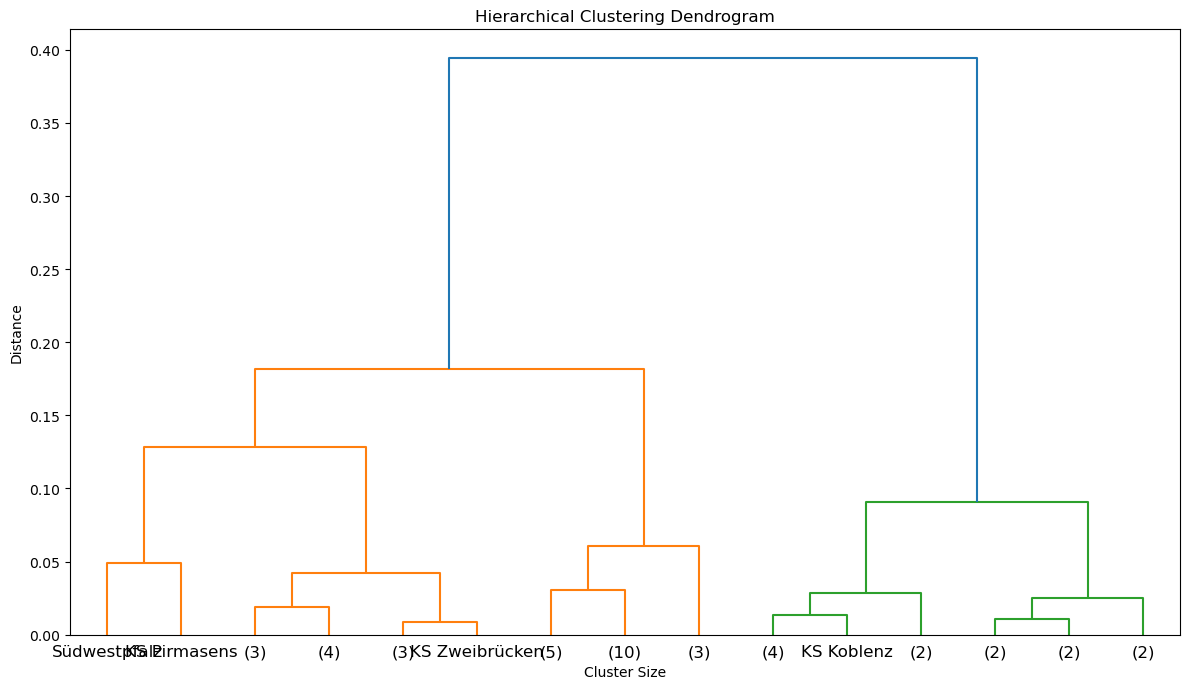

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Agglomerative Hierarchical Clustering
linked = linkage(district_aggregated[['Score']], 'ward')

# Dendrogram
plt.figure(figsize=(12, 7))
dendrogram(linked,
           orientation='top',
           labels=district_aggregated['District'].tolist(),
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=15)  # show only the last 15 merged clusters
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


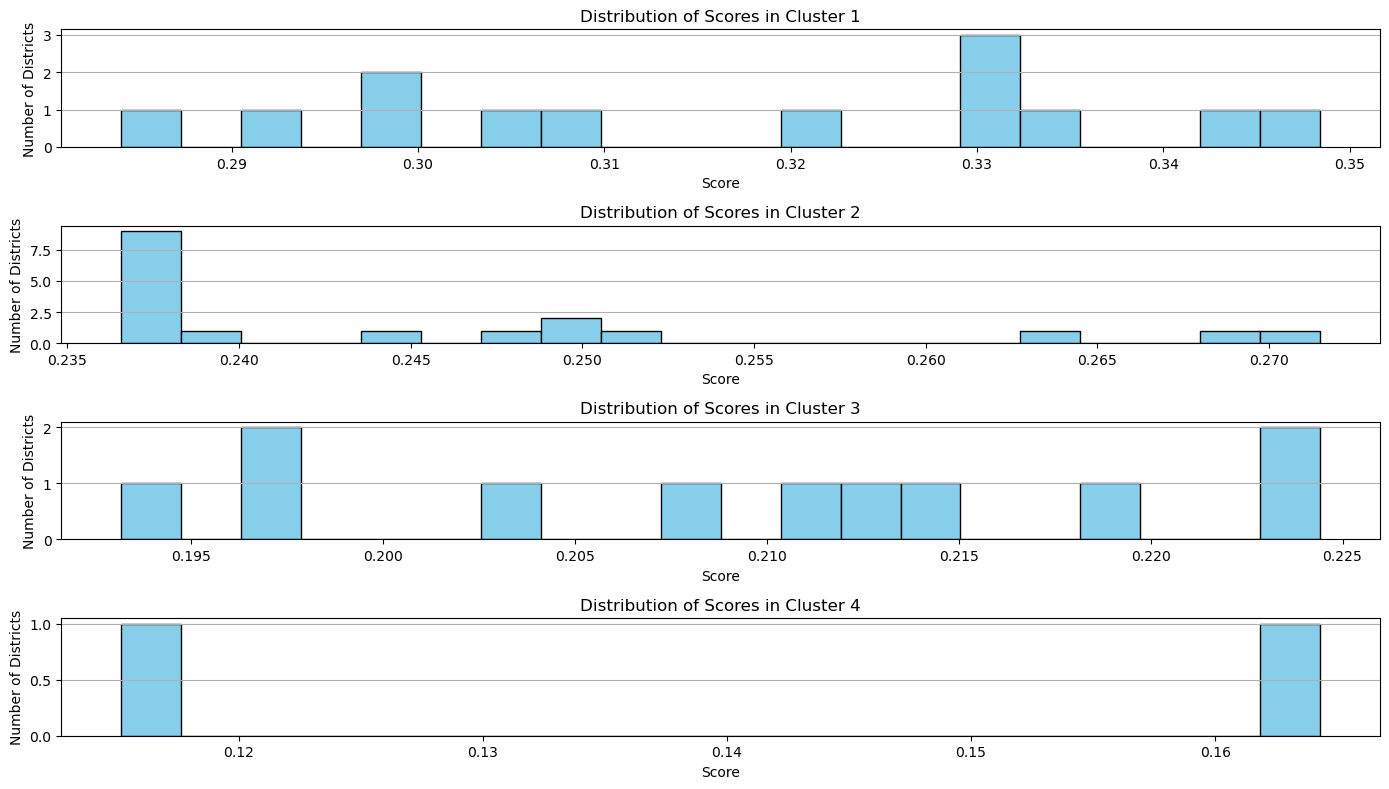

In [25]:
# Assign clusters to each district based on a distance threshold of 0.1
district_aggregated['Cluster'] = fcluster(linked, 0.1, criterion='distance')

# Determine the number of clusters formed
num_clusters = district_aggregated['Cluster'].nunique()

# Visualize the distribution of scores within each cluster
plt.figure(figsize=(14, num_clusters*2))
for i in range(1, num_clusters+1):
    cluster_data = district_aggregated[district_aggregated['Cluster'] == i]['Score']
    plt.subplot(num_clusters, 1, i)
    plt.hist(cluster_data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Scores in Cluster {i}')
    plt.xlabel('Score')
    plt.ylabel('Number of Districts')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()



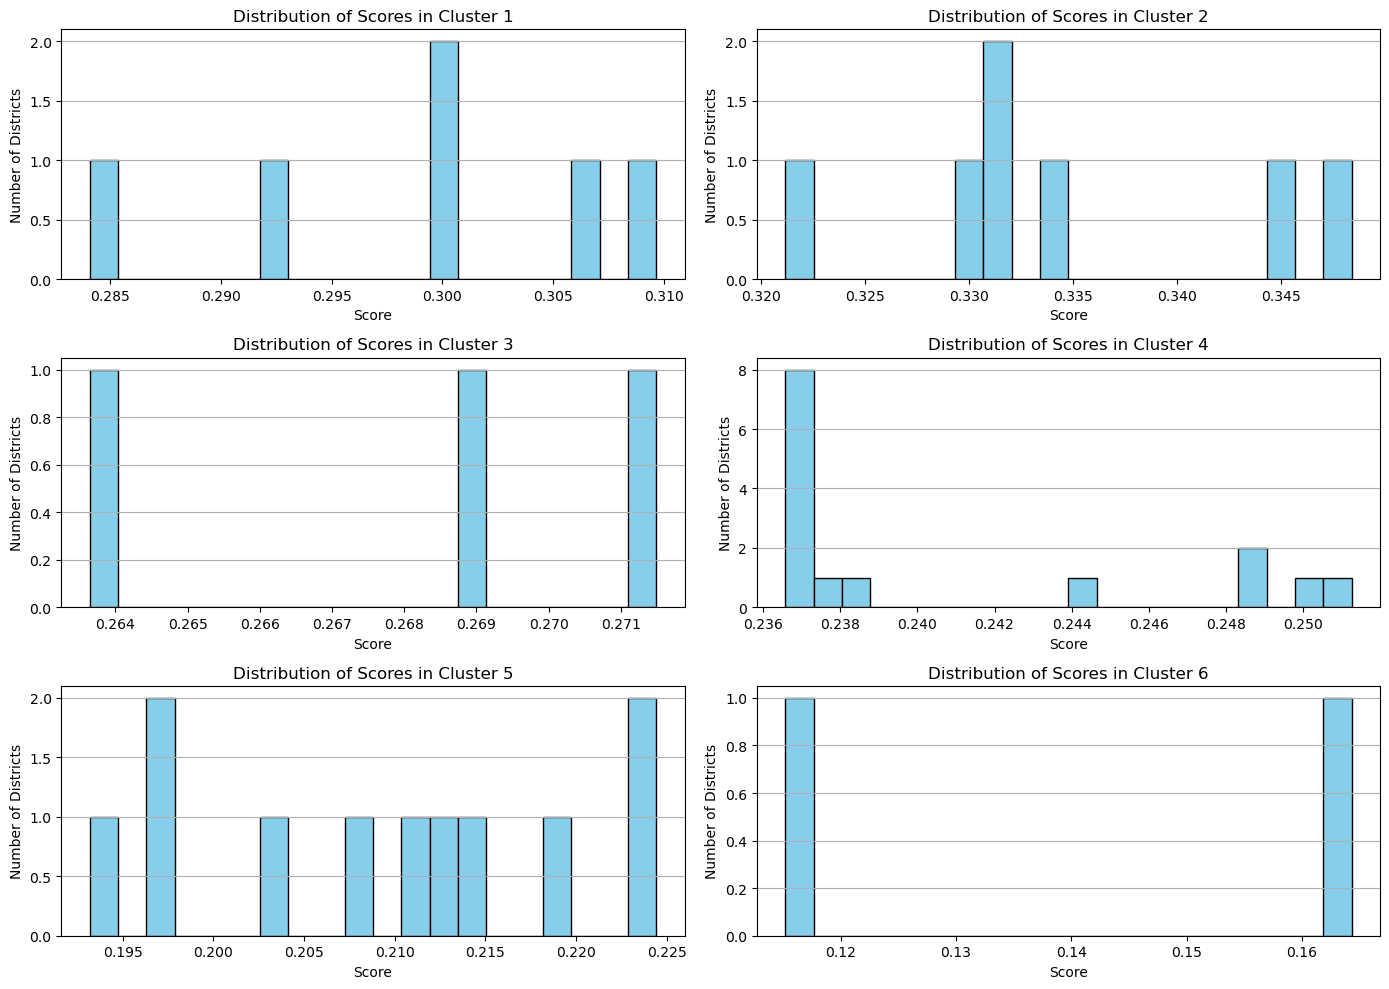

In [26]:
# Assign clusters to each district to get 6 clusters
district_aggregated['Cluster'] = fcluster(linked, 6, criterion='maxclust')

# Visualize the distribution of scores within each cluster
plt.figure(figsize=(14, 10))
for i in range(1, 7):  # As we want 6 clusters
    cluster_data = district_aggregated[district_aggregated['Cluster'] == i]['Score']
    plt.subplot(3, 2, i)
    plt.hist(cluster_data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Scores in Cluster {i}')
    plt.xlabel('Score')
    plt.ylabel('Number of Districts')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()


The histograms provide a representation of the distribution of scores within each of the six clusters:

Cluster 1: Districts with scores in the lowest range.
Cluster 2: Districts with scores in the lower-mid range.
Cluster 3: Districts with scores around the median range.
Cluster 4: Districts with scores in the mid-to-high range.
Cluster 5: Districts with scores in the higher range but not the highest.
Cluster 6: Districts with scores in the highest range.
Using Agglomerative Hierarchical Clustering, we've grouped the districts into six distinct clusters based on their scores. Each cluster represents a set of districts with similar recovery and hospitalization outcomes.

In [36]:
# Extract the district names and their corresponding cluster assignments
district_cluster_mapping = district_aggregated[['District', 'Cluster', 'Score']]

# Display the mapping
district_cluster_mapping.sort_values(by='Cluster').reset_index(drop=True)


,District,Cluster,Score
0,Ahrweiler,1,0.299794
1,Trier-Saarburg,1,0.284089
2,KS Trier,1,0.300121
3,KS Mainz,1,0.292535
4,Mayen-Koblenz,1,0.309641
5,Bitburg-Prüm,1,0.305887
6,KS Speyer,2,0.330211
7,KS Ludwigshafen,2,0.333709
8,KS Koblenz,2,0.321166
9,KS Frankenthal,2,0.348409


Example Analysis: Lets explore why neuwied to assigned to cluster 2.

In [40]:
# Retrieve the score for "Neuwied"
neuwied_score = district_aggregated[district_aggregated['District'] == 'Neuwied']['Score'].values[0]

# Retrieve the scores for Cluster 2
cluster_2_scores = district_aggregated[district_aggregated['Cluster'] == 2]['Score']

neuwied_score, cluster_2_scores.describe()


(0.3311566057883004,
 count    7.000000
 mean     0.334391
 std      0.009214
 min      0.321166
 25%      0.330684
 50%      0.331606
 75%      0.339094
 max      0.348409
 Name: Score, dtype: float64)

From the distribution:

"Neuwied" has a score that is very close to the median score of Cluster 2.
Its score lies within the interquartile range (between the 25th and 75th percentiles) of the scores in Cluster 2.

<Figure size 1500x1000 with 0 Axes>

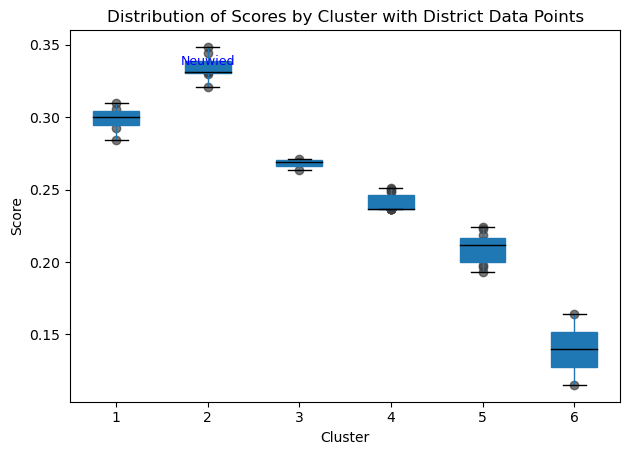

In [41]:
# Plotting the box plot for each cluster using matplotlib
plt.figure(figsize=(15, 10))

# Box plot for each cluster
district_aggregated.boxplot(column='Score', by='Cluster', grid=False, patch_artist=True, medianprops=dict(color='black'))

# Overlay individual district data points
for cluster_num in district_aggregated['Cluster'].unique():
    cluster_data = district_aggregated[district_aggregated['Cluster'] == cluster_num]
    plt.scatter([cluster_num]*len(cluster_data), cluster_data['Score'], color=".25", alpha=0.7)

# Annotating specific districts for clarity
for idx, row in district_aggregated.iterrows():
    if row['District'] == 'Neuwied':
        plt.annotate(row['District'], (row['Cluster'], row['Score']), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='blue')

plt.title('Distribution of Scores by Cluster with District Data Points')
plt.xlabel('Cluster')
plt.ylabel('Score')
plt.suptitle('')  # Remove automatic title
plt.tight_layout()
plt.show()



In [42]:
# Retrieve the score for "Kusel"
neuwied_score = district_aggregated[district_aggregated['District'] == 'Kusel']['Score'].values[0]

# Retrieve the scores for Cluster 5
cluster_5_scores = district_aggregated[district_aggregated['Cluster'] == 5]['Score']

neuwied_score, cluster_5_scores.describe()

(0.20844566188951608,
 count    11.000000
 mean      0.209385
 std       0.010707
 min       0.193190
 25%       0.200225
 50%       0.211629
 75%       0.216622
 max       0.224415
 Name: Score, dtype: float64)

<Figure size 1500x1000 with 0 Axes>

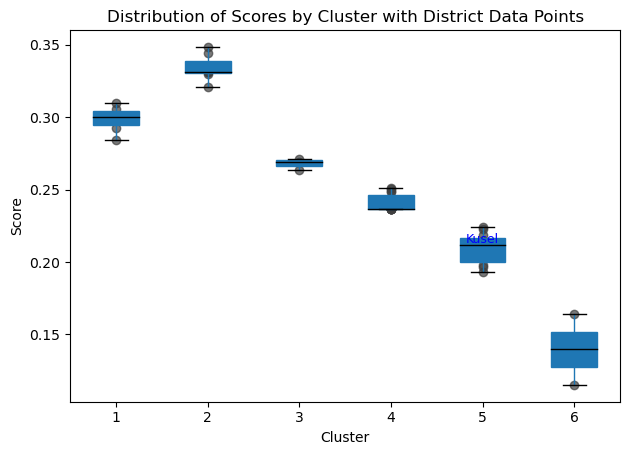

In [43]:
# Plotting the box plot for each cluster using matplotlib
plt.figure(figsize=(15, 10))

# Box plot for each cluster
district_aggregated.boxplot(column='Score', by='Cluster', grid=False, patch_artist=True, medianprops=dict(color='black'))

# Overlay individual district data points
for cluster_num in district_aggregated['Cluster'].unique():
    cluster_data = district_aggregated[district_aggregated['Cluster'] == cluster_num]
    plt.scatter([cluster_num]*len(cluster_data), cluster_data['Score'], color=".25", alpha=0.7)

# Annotating specific districts for clarity
for idx, row in district_aggregated.iterrows():
    if row['District'] == 'Kusel':
        plt.annotate(row['District'], (row['Cluster'], row['Score']), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='blue')

plt.title('Distribution of Scores by Cluster with District Data Points')
plt.xlabel('Cluster')
plt.ylabel('Score')
plt.suptitle('')  # Remove automatic title
plt.tight_layout()
plt.show()

